In [ ]:
# Intro - S

# Statistical Background - Andrew

# Supervised Learning

# Linear/Logistic Regression -Andrew

# Decision Tree / Random Forest Classification - S
#   Train-Test 
#   Hyperparameter tuning
#   Overfitting/Underfitting
#   Feature Importance

# Metrics - S
#   Accuracy, Recall, Precision, F1-Score
#   Confusion Matrix
# ROC Curve?

# Imbalanced Datasets

# Data Cleaning
#   Imputation
#   Missing Values

# Feature Analysis
#   Categorical vs Numerical Features
#   Encodings
#   PCA

# SVM ???

# Cross-validation
#   Different FOLDS

# Unsupervised Learnning
# K-Means 

# Pipelining (Scikit class)

In [ ]:
# Notes



In [17]:
%pip install numpy pandas matplotlib scikit-learn scipy seaborn xlrd

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.5/96.5 kB 3.1 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.1.2 -> 24.3.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm


## Statistical Background


### Types of Data
- Numerical 
- Categorical

In [ ]:
# numerical
a = [1, 2, 3, 4, 5] # discrete
b = [0.001, 0.002, 0.003, 0.004, 0.005] # continuous

# categorical
c = ['a', 'b', 'c', 'd', 'e'] # ordinal
d = ['cat', 'dog', 'bird', 'fish', 'lizard'] # nominal

### Sampling
**Sample Space**: The set of all possible outcomes of an experiment.


In [4]:
# create a random number generator
rng = np.random.default_rng(seed=42)

In [14]:
# consider a coin flip
result_c = rng.choice(['heads', 'tails'], size=1) # what is the sample space?

# consider a die roll
result_d = rng.choice([1, 2, 3, 4, 5, 6], size=2) # what is the sample space?

print(result_c)
print(result_d)


['tails']
[5 5]


### Probability Distributions (Distributions)

"A distribution is a function that gives the probabilities of occurrence of possible outcomes for an experiment."

**Examples**:
- Uniform Distribution
- Normal Distribution
- Binomial Distribution
- etc.



**Normal Distribution**

<img src="./extra/imgs/normal_dist.png" alt="normal distribution" width="700" height="400"/>


**Uniform Distribution**

<img src="./extra/imgs/uniform_dist.png" alt="uniform distribution" width="650" height="400"/>


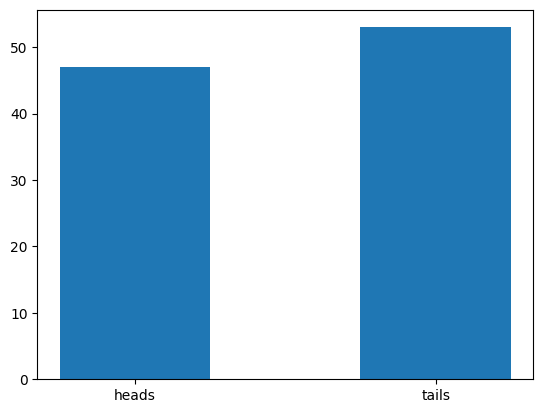

In [220]:
# consider a coin flip again

result_c = rng.choice(['heads', 'tails'], size=100) 

head_count = np.count_nonzero(result_c == 'heads')
tail_count = np.count_nonzero(result_c == 'tails')

plt.bar(x=['heads', 'tails'], height=[head_count, tail_count], width=0.5)

plt.show()
# what type of distribution are we sampling from?

### Normalization

# What is Machine Learning?

Application of artificial intelligence ( AI ) algorithms that are able to 
learn from data and imitate the way human beings make decisions without explicit instructions.

**Machine Learning Uses:**
* Prediction
* Image Recognition
* Speech recognition
* Medical Diagnoses

## Types of Machine Learning

**Supervised Learning:**
* System is trained on labeled Data
* EX: classification,regression

**Unsupervised Learning:**
* System is trained on unlabeled data
* EX: Clustering, Association

## Four Steps to Creating an ML ( Machine Learning ) Model

1. Select and Prepare a Dataset
2. Choose an algorithm to run on the dataset
3. Train the algorithm
4. Using & Improving the model


# First Model : Decision Tree

In [4]:
# Import packages

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
# Load bread cancer dataset
cancer = load_breast_cancer()
X = pd.DataFrame(cancer.data, columns=cancer.feature_names)
y = cancer.target

In [5]:
# Lets take a look at our features

print(X)

# Features, aka the columns of our data, represent data variables that help our model learn patterns

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

In [11]:
# Lets look at our target

print(y)

# Since this is a binary classification problem, we are determining whether or not cancer is benign or malignant
# 0 = malignant ( cancerous ), 1 = benign

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [6]:
# Lets look at our class distribiion

print(f"Class distribution: \n{pd.Series(y).value_counts()}")

Class distribution: 
1    357
0    212
Name: count, dtype: int64


In [7]:
# Split the data into training and testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Train a simple decision tree for visualization
dt = DecisionTreeClassifier(max_depth=3, random_state=42)

dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

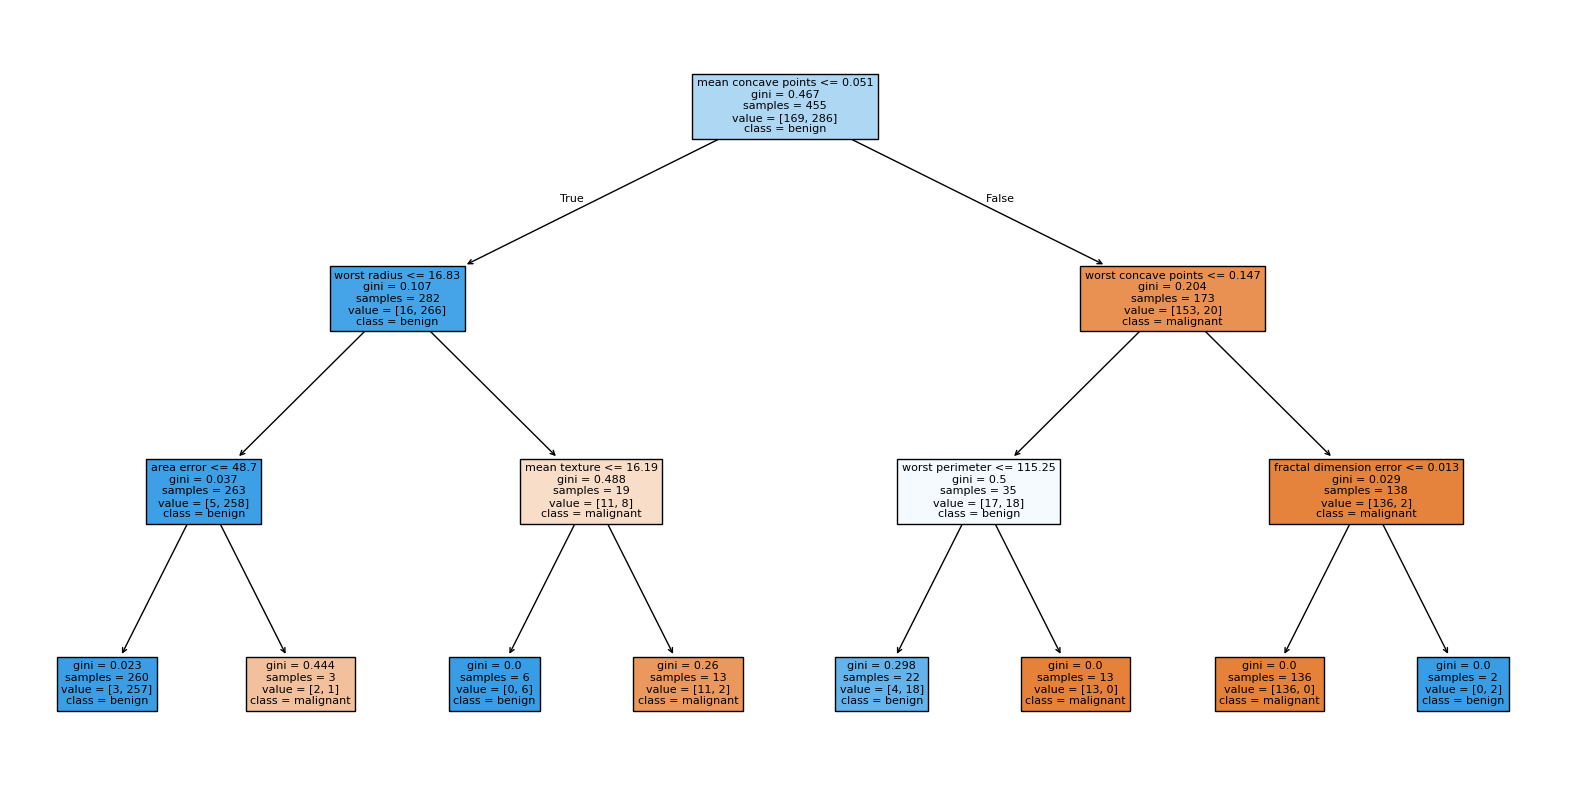

In [9]:
# Visualize Decision Tree
plt.figure(figsize=(20,10))
plot_tree(dt, feature_names=cancer.feature_names, class_names=cancer.target_names, filled=True)
plt.show()

In [20]:
# Better tree, use more parameters explain them etc

dt = DecisionTreeClassifier(max_depth=5, random_state=42)

# Fit on the training Data
dt.fit(X_train, y_train)

# Predict on the testing data
y_pred = dt.predict(X_test)
print(y_pred)

[1 0 0 1 1 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 1 1 1 0 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 0 1 0
 1 1 0]


There are many different parameters you can use to help increase Decision Tree accuracy...

max_depth: limits how deep the tree can grow
min_samples_split: minimum samples required to split at a node
min_samples_leaf: each leaf must have this many samples
random_state: controls the randomness of a tree

## **METRICS**

* When working with classification tasks, we often use metrics based on the proportion of true and false predicitions

Example: Breast Cancer Prediction

**True Positive:** Amount of correctly identified malignant tumors

**False Positive:** Amount of incorrectly identified malignant tumors

**True Negative:** Amount of correctly identified benign tumors

**False Negative:** Amount of incorrectly identified benign tumors

In [21]:
# Evaluate Prediction Quality
# sklearn accuracy_score() returns the accuracy score of the given predictions

accuracy_score(y_test, y_pred)

0.9473684210526315

### **Accuracy Score:**

Proportion of all scores that are correct

ACC = ( TN + TP ) / ALL SCORES


In [22]:
# You could also use...
# DecisionTreeClassifier.score() returns the accuracy score of the given predictions

train_score = dt.score(X_train, y_train)
test_score = dt.score(X_test, y_test)

print(train_score)
print(test_score)

0.9956043956043956
0.9473684210526315


In [26]:
# Evaluating with Classification Report

clf_report = classification_report(y_test, y_pred)

print(clf_report)

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



### **Precision:**
* Measures the quality / accuracy of the predicitions, AKA, how often the model predicts correctly

( When we predict cancer, how often are we correct ? )

TP / ( TP + FP )

### **Recall:**
* Measures the quantity of the predicitions, AKA the amt of correct positive predictions

( Of all the cancer cases, how many did we catch ? )

TP / ( TP + FN )


### When to use which ?

Precision Priority
* Email spam filtering (better to let spam through than block real emails)
* Product recommendations (better to show fewer but more relevant items)

Recall Priority
* Cancer screening (better to have false alarms than miss cancer)
* Fraud detection (better to investigate false leads than miss fraud)

/

**F1-Score**
* balanced measure of performance, computes the average of precision and recall

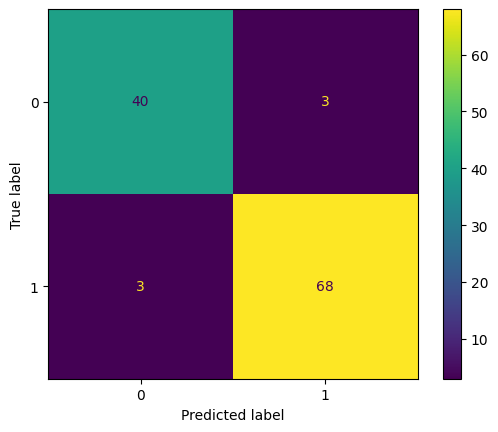

In [30]:
# Evaluating with Confusion Matrix

c_matrix = confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = c_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()

### MINI CHALLENGE :)

**Hyperparameter Tuning**:
* This is a key step in using ML algorithms, where you find the best parameters to use when training a model

Manipulate the parameters of the original Decision tree to achive a better accuracy score

In [ ]:
dt_new = DecisionTreeClassifier( ______ )

dt_new.fit(X_train, y_train)
y_pred_new = dt_new.predict(X_test)
print( accuracy_score(y_test, y_pred_new) )

# Second Model: RandomForest

**Random Forest**:
* an algorithm that combines the output of multiple trees to reach a result.

For classification tasks, the output is the class selected by the most trees

In [31]:
# Initialize and fit your Random Forest Classifier on the same data

rf = RandomForestClassifier(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

In [32]:
# Evaluate, did the RF model perform better than the DT?

accuracy_score(y_test, rf_pred)

0.9649122807017544

## Underfitting vs Overfitting

When evaluating the quality of a ML model, it is important to determine the quality of the fit.

**Overfitting**:
* The model is too complex and fits the training data too closely, thus is unable to make quality predicitons on new data
* High Training Accuracy with low testing accuracy


**Underfitting**
* The model is too simple, and cannot find the underlying patterns of the data
* Poor training and testing accuracies

In a good balanced model, the algorithm will capture important patterns without memorizing noise

In [39]:
underfit_rf = RandomForestClassifier(
    n_estimators=2,  # Very few trees
    max_depth=2,     # Very shallow trees
    random_state=42
)

underfit_rf.fit(X_train, y_train)
rf_pred_train = underfit_rf.predict(X_train)
rf_pred_test = underfit_rf.predict(X_test)

train_score =  accuracy_score(y_train, rf_pred_train)
test_score =  accuracy_score(y_test, rf_pred_test)

print(f"Train Accuracy: {train_score:.3f}")
print(f"Test Accuracy: {test_score:.3f}")
print(f"Gap: {train_score - test_score:.3f}")

Train Accuracy: 0.927
Test Accuracy: 0.930
Gap: -0.002


In [40]:
good_rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=5,
    min_samples_leaf=4,
    random_state=42
)

good_rf.fit(X_train, y_train)
rf_pred_train = good_rf.predict(X_train)
rf_pred_test = good_rf.predict(X_test)

train_score =  accuracy_score(y_train, rf_pred_train)
test_score =  accuracy_score(y_test, rf_pred_test)

print(f"Train Accuracy: {train_score:.3f}")
print(f"Test Accuracy: {test_score:.3f}")
print(f"Gap: {train_score - test_score:.3f}")

Train Accuracy: 0.985
Test Accuracy: 0.965
Gap: 0.020


In [41]:
overfit_rf = RandomForestClassifier(
    n_estimators=500,
    max_depth=None,  # Unlimited depth
    min_samples_leaf=1,  # Allow single-sample leaves
    random_state=42
)

overfit_rf.fit(X_train, y_train)
rf_pred_train = overfit_rf.predict(X_train)
rf_pred_test = overfit_rf.predict(X_test)

train_score =  accuracy_score(y_train, rf_pred_train)
test_score =  accuracy_score(y_test, rf_pred_test)

print(f"Train Accuracy: {train_score:.3f}")
print(f"Test Accuracy: {test_score:.3f}")
print(f"Gap: {train_score - test_score:.3f}")

Train Accuracy: 1.000
Test Accuracy: 0.965
Gap: 0.035


## Feature Importance

Feature selection is an important step for improving your Machine learning model.
By removing unneccesary features ( columns ), sometimes you can improve the performance and runtime of your model.

In [84]:
# For this example, we will be using a wine quality dataset

wine_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
wine = pd.read_csv(wine_url, sep=";")

# Prepare data
X = wine.drop('quality', axis=1)
y = wine['quality']

wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [85]:
# Split and scale data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [89]:
# Train a random Forest Classifier

rf_clf = RandomForestClassifier(
    n_estimators=100,
    max_depth=5,
    min_samples_leaf=4,
    random_state=42
)
rf_clf.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=4, random_state=42)

In [90]:
# Lets calculate our prediction accuracy 

rf_pred_train = rf_clf.predict(X_train)
rf_pred_test = rf_clf.predict(X_test)
train_score =  accuracy_score(y_train, rf_pred_train)
test_score =  accuracy_score(y_test, rf_pred_test)

print(f"Train Accuracy: {train_score:.3f}")
print(f"Test Accuracy: {test_score:.3f}")
print(f"Gap: {train_score - test_score:.3f}")

Train Accuracy: 0.431
Test Accuracy: 0.406
Gap: 0.025


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [91]:
# Some classifiers such as Random Forest, have built in tools to help you determine feature importance
# lets determine the best features using our good_rf model

rf_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_clf.feature_importances_
}).sort_values('importance', ascending=False)

rf_importance

,feature,importance
10,alcohol,0.302983
9,sulphates,0.148770
6,total sulfur dioxide,0.121790
1,volatile acidity,0.105122
7,density,0.082201
4,chlorides,0.047467
0,fixed acidity,0.046178
2,citric acid,0.044417
8,pH,0.035440
5,free sulfur dioxide,0.033501


## Mini Challenge :)

Using Feature importance, determine top 3 least important features.

Then, see what removing them from the data does for your model.

In [92]:
print("\n Least Important Features (Random Forest):")
print(rf_importance.tail())


 Least Important Features (Random Forest):
               feature  importance
0        fixed acidity    0.046178
2          citric acid    0.044417
8                   pH    0.035440
5  free sulfur dioxide    0.033501
3       residual sugar    0.032131


In [99]:
# Drop your feature(s)

X_new = X.drop([___], axis=1, inplace=False)

X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y, test_size=0.3, random_state=42)

In [100]:
# Evaluate your new model using good_rf, did the performance improve?

rf_clf.fit(X_train_new, y_train_new)
rf_pred_train = rf_clf.predict(X_train_new)
rf_pred_test = rf_clf.predict(X_test_new)

train_score =  accuracy_score(y_train_new, rf_pred_train)
test_score =  accuracy_score(y_test_new, rf_pred_test)

print(f"Train Accuracy: {train_score:.3f}")
print(f"Test Accuracy: {test_score:.3f}")
print(f"Gap: {train_score - test_score:.3f}")

# !!!Problem: only mean symmetry really imporves the training accuracy and only by a lil bit, might want to use diff data?

Train Accuracy: 0.697
Test Accuracy: 0.596
Gap: 0.101


# Data Cleaning & Preprocessing

In [21]:
# dataset of titanic passengers

url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
titanic_df = pd.read_csv(url)

titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


#### An important first step in Data preprocessing, is identifying the types of features you have

##### **Numerical Features**
* Represent measurable quantities
* Can have numerical calculations performed on them, such as adding, subtracting, and averaging

Two types:

**Continuous**: any value within a range
Ex ) Fare

**Discrete**: distinct, seperate values
Ex ) Age, or number of cars a person owns

##### **Categorical Features**
* Data represented by a limited, fixed number of categories or labels
* Describe characteristics or qualities

Two types:

**Nominal**: Categories without any intrinsic order or ranking. Simple labels
Ex ) Sex, or the color of an object

**Ordinal**: Categories with meaningful order or ranking
Ex ) Education Level ( high school, bachelors, masters, PHD )


## Data Cleaning - Handling Missing Values

Not every dataset will have every single datapoint
Missing values can lead to a lot of issues affecting the accuracy of your program

Two ways to deal with missing data values:
* Drop all columns with missing values
* Imputation

In [22]:
# First, identify the amount of missing values in your dataset
# this can be done using the isnull() method, which flags null values

print(titanic_df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


There are 3 different columns with missing values:
* Age 
* Cabin
* Embarked

The most basic strategy for handling missing values is by dropping them

In [7]:
# The most simple way to drop missing values, would be dropping them all with dropna()

titanic_df.dropna(inplace=False)

# Using this strategy removes over 700 entries, which is not ideal

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [23]:
# Looking at our columns with missing values, Embarked only has two.
# Thus, it would be acceptible to drop only those entries.
# This can be done using the subset parameter

titanic_df.dropna(subset=['Embarked'], inplace=True)

print(titanic_df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64


In [24]:
# Another method for handling missing data, is to drop columns outright
# Looking at our data, Cabin has 687 missing entries, which is over half our data
# Thus, dropping it is reasonable

titanic_df.drop(columns=['Cabin'], inplace=True)

print(titanic_df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64


Another strategy for handling missing values is **Imputation**.

With imputation, for each missing value, fill empty spot with a specific number (usually an average).

Steps for Imputation:
* Sklearn has a method for imputation called SimpleImputer()
* Intialize the imputer
* Transform the data by assigning an estimated value to each empty spot


In [25]:
from sklearn.impute import SimpleImputer

# We are going to be targeting the Age column with imputation
# Age is a numerical value
# We will be using the median age to fill in the missing values

numeric_features = ['Age', 'Fare']
# We are imputing both Age and Fare, since the simple imputer is expecting a dataFrame input, not a series

imputer = SimpleImputer(strategy='median')

titanic_df[numeric_features] = imputer.fit_transform(titanic_df[numeric_features])

print(titanic_df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


Now that we have handled our missing values, we can move on to other preprocessing steps

# Data Preprocessing - Handling Categorical Variables

Not every variable is going to be numerical.

To utilize categorical data, it is important to convert it into forms that the algorithm can use

How do we handle this:
* Dropping Categorical Variables
* Label Encoding
* One-Hot Encoding

In [26]:
# Name and Ticket are irrelevant categorical variables, so they are safe to drop

columns_to_drop = ['Name', 'Ticket']

titanic_df.drop(columns=columns_to_drop, inplace=True)

print(titanic_df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


#### Categorical Encoders - Label Encoding

“Labels” each value with a distinct value

The LabelEncoder() looks at all unique values in the column

and alphabetically assigns integers starting from 0

Example: ‘Strongly Agree’ = 5 ‘Strongly Disagree’ = 1

This approach does not work well if values do not have clear numerical ordering

In [27]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# We will be using categorical label feature Sex to demonstrate
categorical_features = ['Sex']

for feature in categorical_features:
    titanic_df[feature + '_encoded'] = label_encoder.fit_transform(titanic_df[feature])
    
titanic_df[['Sex', 'Sex_encoded']]

,Sex,Sex_encoded
0,male,1
1,female,0
2,female,0
3,female,0
4,male,1
...,...,...
886,male,1
887,female,0
888,female,0
889,male,1


#### Categorical Encoders - One Hot Encoding

Basic Idea: Creating new columns to show the presence/absence of the categorical variables from the original data

Does not work well when datasets have large amounts of different categorical values

In [30]:
from sklearn.preprocessing import OneHotEncoder

# We will be using categorical label feature Embarked to demonstrate
categorical_features = ['Embarked']

oh_encoder = OneHotEncoder(sparse_output=False)

for feature in categorical_features:

    # double brackets since OneHotEncoder expects a dataFrame, not a series
    encoded_values = oh_encoder.fit_transform(titanic_df[[feature]])
    
    # Get the one-hot encoded feature names (e.g., 'Embarked_C', 'Embarked_Q', 'Embarked_S')
    encoded_columns = oh_encoder.get_feature_names_out([feature])

    # Create new columns in the DataFrame with the one-hot encoded values
    encoded_df = pd.DataFrame(encoded_values, columns=encoded_columns)

    # Concatenate the encoded columns to the original DataFrame
    titanic_df = pd.concat([titanic_df, encoded_df], axis=1)


print(titanic_df[['Embarked'] + list(encoded_df.columns)])


    Embarked  Embarked_C  Embarked_Q  Embarked_S
0          S         0.0         0.0         1.0
1          C         1.0         0.0         0.0
2          S         0.0         0.0         1.0
3          S         0.0         0.0         1.0
4          S         0.0         0.0         1.0
..       ...         ...         ...         ...
888        S         0.0         1.0         0.0
889        C         NaN         NaN         NaN
890        Q         NaN         NaN         NaN
61       NaN         0.0         0.0         1.0
829      NaN         0.0         0.0         1.0

[891 rows x 4 columns]


In [32]:
titanic_df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex_encoded,Embarked_C,Embarked_Q,Embarked_S
0,1.0,0.0,3.0,22.0,1.0,0.0,7.2500,S,1.0,0.0,0.0,1.0
1,2.0,1.0,1.0,38.0,1.0,0.0,71.2833,C,0.0,1.0,0.0,0.0
2,3.0,1.0,3.0,26.0,0.0,0.0,7.9250,S,0.0,0.0,0.0,1.0
3,4.0,1.0,1.0,35.0,1.0,0.0,53.1000,S,0.0,0.0,0.0,1.0
4,5.0,0.0,3.0,35.0,0.0,0.0,8.0500,S,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
888,889.0,0.0,3.0,28.0,1.0,2.0,23.4500,S,0.0,0.0,1.0,0.0
889,890.0,1.0,1.0,26.0,0.0,0.0,30.0000,C,1.0,NaN,NaN,NaN
890,891.0,0.0,3.0,32.0,0.0,0.0,7.7500,Q,1.0,NaN,NaN,NaN
61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0


In [34]:
# Drop Un-needed columns

titanic_df.drop(columns=['Sex', 'Embarked'], inplace=True)

# Data Preprocessing - Normalization 

Data Scaling / Normalization is a highly reccommended preprocessing step prior to modeling.

Many machine learning algorithms like Gradient descent methods, KNN algorithm, linear and logistic regression, etc. require data scaling to produce good results.

Your method of Scaling often depends on your data or your algorithm.

In [2]:
from sklearn.datasets import fetch_california_housing

california = fetch_california_housing()
california_df = pd.DataFrame(california.data, columns=california.feature_names)
    
california_df

NameError: name 'pd' is not defined

In [37]:
# Features explanation
features_to_analyze = {
        'MedInc': 'Median Income - Right-skewed',
        'AveRooms': 'Average Rooms - Contains outliers',
        'Population': 'Population - Large scale differences',
        'Latitude': 'Latitude - Bounded geographic',
        'HouseAge': 'House Age - Bounded numeric'
}

analysis_df = california_df[features_to_analyze.keys()].copy()

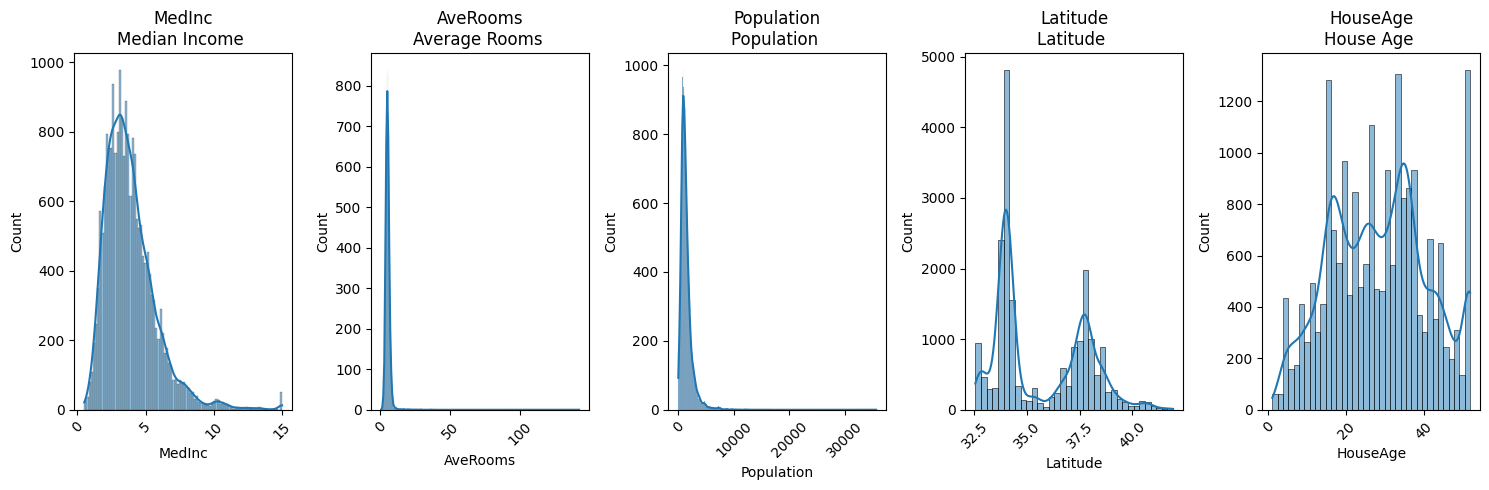

In [39]:
# Visualize Distributions

plt.figure(figsize=(15, 5))
for i, (feature, description) in enumerate(features_to_analyze.items(), 1):
    plt.subplot(1, 5, i)
    sns.histplot(analysis_df[feature], kde=True)
    plt.title(f'{feature}\n{description.split("-")[0]}')
    plt.xticks(rotation=45)
    plt.tight_layout()

##### Standard Scaler

* Standard Scaler is a normalization technique that transforms data to have mean=0 and standard dev=1
* This process ensures that all features are on the same scale, preventing any single feature from dominating the learning process due to its larger magnitude.


The transformation performed by StandardScaler can be expressed mathematically as:

z=x−μ/σ​

where x represents the original feature value, μ is the mean of the feature, σ is the standard deviation, and z is the standardized feature value.

In [41]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(analysis_df)
stdScaled_df = pd.DataFrame(scaled_data,
                         columns=analysis_df.columns)

print(stdScaled_df.head())

     MedInc  AveRooms  Population  Latitude  HouseAge
0  2.344766  0.628559   -0.974429  1.052548  0.982143
1  2.332238  0.327041    0.861439  1.043185 -0.607019
2  1.782699  1.155620   -0.820777  1.038503  1.856182
3  0.932968  0.156966   -0.766028  1.038503  1.856182
4 -0.012881  0.344711   -0.759847  1.038503  1.856182


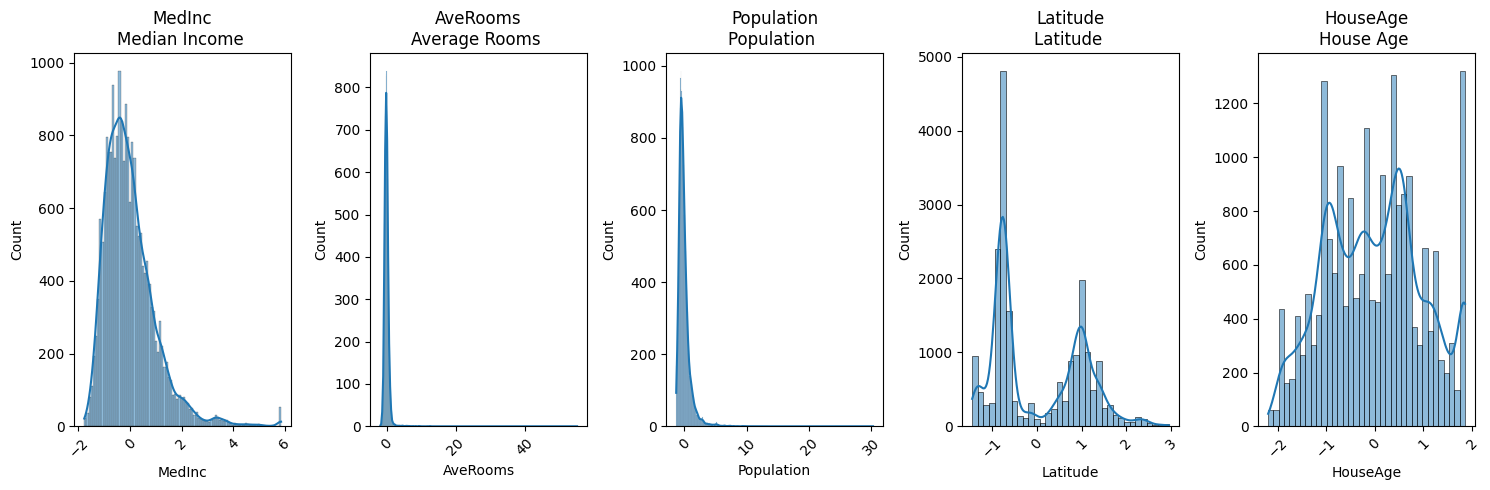

In [43]:
# Visualize new Distributions

plt.figure(figsize=(15, 5))
for i, (feature, description) in enumerate(features_to_analyze.items(), 1):
    plt.subplot(1, 5, i)
    sns.histplot(stdScaled_df[feature], kde=True)
    plt.title(f'{feature}\n{description.split("-")[0]}')
    plt.xticks(rotation=45)
    plt.tight_layout()

You're probably thinking: Okay,,, this looks exactly the same!

But take a closer look and see that the range on the X axes have changed.

StandardScaler does not alter the shape of the distribution of each feature; it only shifts and scales it. 

#### MinMax Scaler

* MinMaxScaler is a normalization technique that makes a distributions minimum=0 and maximum=1
* MinMax Scaler shrinks the data within the given range, and transforms data by scaling features to a given range.

Like StandardScaler, this does not change the shape of the original distribution.

In [44]:
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()
minmax_data = minmax_scaler.fit_transform(analysis_df)
minmax_df = pd.DataFrame(minmax_data,
                         columns=analysis_df.columns)

print(minmax_df.head())

     MedInc  AveRooms  Population  Latitude  HouseAge
0  0.539668  0.043512    0.008941  0.567481  0.784314
1  0.538027  0.038224    0.067210  0.565356  0.392157
2  0.466028  0.052756    0.013818  0.564293  1.000000
3  0.354699  0.035241    0.015555  0.564293  1.000000
4  0.230776  0.038534    0.015752  0.564293  1.000000


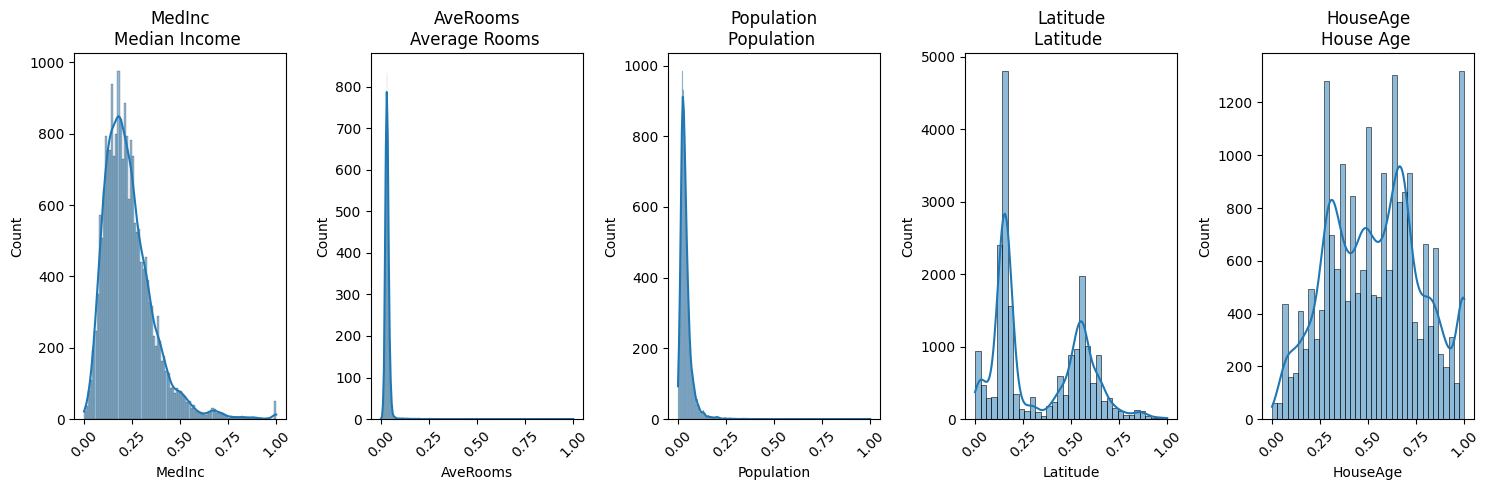

In [45]:
# Visualize new Distributions

plt.figure(figsize=(15, 5))
for i, (feature, description) in enumerate(features_to_analyze.items(), 1):
    plt.subplot(1, 5, i)
    sns.histplot(minmax_df[feature], kde=True)
    plt.title(f'{feature}\n{description.split("-")[0]}')
    plt.xticks(rotation=45)
    plt.tight_layout()

As you can see in the graphs, while the shape appears the same, the range on the X axes has changed.
* They are all now bounded between 0 and 1

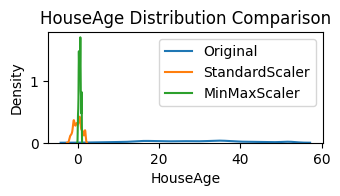

In [47]:
# Lets compare the Distributions

plt.subplot(3, 2, i+1)
        
        # Plot original and scaled distributions
sns.kdeplot(data=analysis_df[feature], label='Original')
sns.kdeplot(data=stdScaled_df[feature], label='StandardScaler')
sns.kdeplot(data=minmax_df[feature], label='MinMaxScaler')
        
plt.title(f'{feature} Distribution Comparison')
plt.legend()
plt.tight_layout()
plt.show()

In [48]:
# Lets see how this changed the distributions of our features numericallu

for feature in features_to_analyze.keys():
        print(f"\n{feature}:")
        print("Original Data:")
        print(f"Range: [{analysis_df[feature].min():.2f}, {analysis_df[feature].max():.2f}]")
        print(f"Mean: {analysis_df[feature].mean():.2f}")
        print(f"Std: {analysis_df[feature].std():.2f}")
        
        print("\nAfter StandardScaler:")
        std_scaled = stdScaled_df[feature]
        print(f"Range: [{std_scaled.min():.2f}, {std_scaled.max():.2f}]")
        print(f"Mean: {std_scaled.mean():.2f}")  # Should be close to 0
        print(f"Std: {std_scaled.std():.2f}")    # Should be close to 1
        
        print("\nAfter MinMaxScaler:")
        minmax_scaled = minmax_df[feature]
        print(f"Range: [{minmax_scaled.min():.2f}, {minmax_scaled.max():.2f}]")
        print(f"Mean: {minmax_scaled.mean():.2f}")
        print(f"Std: {minmax_scaled.std():.2f}")


MedInc:
Original Data:
Range: [0.50, 15.00]
Mean: 3.87
Std: 1.90

After StandardScaler:
Range: [-1.77, 5.86]
Mean: 0.00
Std: 1.00

After MinMaxScaler:
Range: [0.00, 1.00]
Mean: 0.23
Std: 0.13

AveRooms:
Original Data:
Range: [0.85, 141.91]
Mean: 5.43
Std: 2.47

After StandardScaler:
Range: [-1.85, 55.16]
Mean: 0.00
Std: 1.00

After MinMaxScaler:
Range: [0.00, 1.00]
Mean: 0.03
Std: 0.02

Population:
Original Data:
Range: [3.00, 35682.00]
Mean: 1425.48
Std: 1132.46

After StandardScaler:
Range: [-1.26, 30.25]
Mean: -0.00
Std: 1.00

After MinMaxScaler:
Range: [0.00, 1.00]
Mean: 0.04
Std: 0.03

Latitude:
Original Data:
Range: [32.54, 41.95]
Mean: 35.63
Std: 2.14

After StandardScaler:
Range: [-1.45, 2.96]
Mean: -0.00
Std: 1.00

After MinMaxScaler:
Range: [0.00, 1.00]
Mean: 0.33
Std: 0.23

HouseAge:
Original Data:
Range: [1.00, 52.00]
Mean: 28.64
Std: 12.59

After StandardScaler:
Range: [-2.20, 1.86]
Mean: 0.00
Std: 1.00

After MinMaxScaler:
Range: [0.00, 1.00]
Mean: 0.54
Std: 0.25


# Data Clustering - with KMEANS

#### What is Cluster Analysis?

Finding simularities between data according to the characteristics found in the data 
and grouping similar data objects into clusters

Cluster analysis is a form of **unsupervised learning**

**Cluster:** a collection of data objects
* similar to one another in the same cluster
* dissimilar to objects in other clusters

Applications
* Standalone tool
* preprocessing step for other algorithms

A good clustering method will produce high wuality clutsers with
* high intra-class simularity ( less distance between objects in same cluster )
* low inter-class simularity ( more distance between objects of different clusters )

</br>

<img src="./extra/imgs/clustering.jpeg" alt="clustering" width="700" height="400"/>

#### K-Means clustering method

Partitioning method: 
Find a global optimal clustering, aka
Given a k, find a partition of k clusters that optimizes the chosen paritioning criterion

Given k, the K-means algorithm is implemented in 4 steps:
1. Partition objects into k nonempty subsets
2. Compute seed points as the centroids of the clusters of the current partition
3. Assign each object t the cluster with the nearest seed point
4. repeat from step 2 untill no more new assignments

Centroid: typically the mean of the points in the cluster

Closeless is measured by Euclidean distance, or other equations
d = √[ (x2 – x1)^2 + (y2 – y1)^2 ]
( pythagoreas theorem )

In [53]:
# For this example, we will be using the iris dataser

from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
feature_names = iris.feature_names
target_names = iris.target_names

#Take a look at our data
pd.DataFrame(data=X, columns=feature_names)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [54]:
# Lets take a look at our classes

print(target_names)

['setosa' 'versicolor' 'virginica']


In [55]:
# For applying distance based algorithms like k-means,
# scaling / normalization is reccomended

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Text(0.5, 1.0, 'Original Iris Classes')

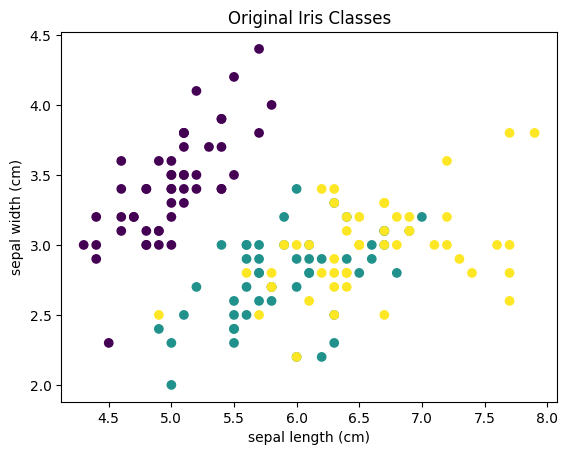

In [57]:
# Lets take a look at the mapping of the original points and their respective classes

plt.scatter(X[:, 0], X[:, 1], c=iris.target, cmap='viridis')
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.title('Original Iris Classes')

In [71]:
# Lets perform clustering with k-means
# We will be using 3 clusters since there are 3 classes

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

KMeans(n_clusters=3, random_state=42)

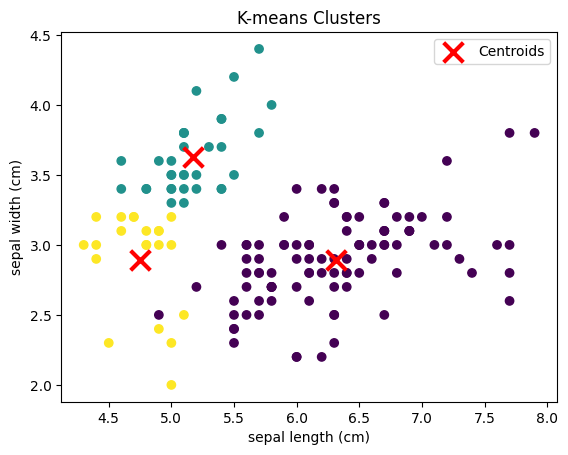

In [72]:
# Now lets plot the points with the kmeans calculated clusters

plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis')
# Grab the kmeans calculated centroids 
centers = kmeans.cluster_centers_
# Converts back to og scale for meaningful visualization in original feature space
centers_original = scaler.inverse_transform(centers)
plt.scatter(centers_original[:, 0], centers_original[:, 1], 
            c='red', marker='x', s=200, linewidth=3, label='Centroids')
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.title('K-means Clusters')
plt.legend()

### MINI CHALLENGE :)

The kmeans algorithm can result in slightly different calculations each time
depending on where the initial randomized centers are placed.

Using random_state, this can be manipulated. 

For this challenge, I want you to adjust the number on the random_state in the kmeans call,
and try to find a clustering that matches closer to the original iris classes scatterplot. 

# Ending Challenge :D

Using the credit card default dataset, use the steps you've learned to evaluate a model.

you will..
- handle missing data
- identify categorical variables
- handle categorical values
- choose a model we have learned today
- evaluate your model

Your target to predict: Loan Status

In [44]:
load_df = pd.read_csv('loan.csv')

load_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
